In [140]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [141]:
ridefile_path = 'data/ride_data.csv'
ride_df = pd.read_csv(ridefile_path)
ride_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [142]:
cityfile_path = 'data/city_data.csv'
city_df = pd.read_csv(cityfile_path)
city_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [143]:
pb_df = pd.merge(ride_df, city_df, how = 'left', on = 'city')
pb_df.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942,35,Urban
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587,55,Urban
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892,68,Urban
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673,8,Urban


In [144]:
# Your objective is to build a Bubble Plot that showcases the relationship between four key variables:
# Average Fare ($) Per City
# Total Number of Rides Per City
# Total Number of Drivers Per City
# City Type (Urban, Suburban, Rural)

In [145]:
total_fare_dict = pb_df.groupby('city').fare.sum().to_dict()
#total_fare_dict

In [146]:
total_ride_dict = pb_df.groupby('city').ride_id.count().to_dict()
#total_ride_dict

In [147]:
uq_df = pb_df.drop_duplicates(['city'], keep = 'last')
#df.loc['city','driver_count','type']
new_uq_df = uq_df[['city','driver_count','type']].sort_values('city') 
#new_uq_df.groupby('city').driver_count.sum().to_dict()
#area_dict = dict(zip(new_uq_df['city'], new_uq_df['driver_count']))
driver_dict = dict(zip(new_uq_df.city, new_uq_df.driver_count))
#driver_dict

In [148]:
type_dict = dict(zip(new_uq_df.city, new_uq_df.type))
#type_dict

In [149]:
avg_fare_dict = {x:total_fare_dict[x]/total_ride_dict[x] for x in total_ride_dict}
#avg_fare_dict

In [150]:
city_list = list(avg_fare_dict.keys())
avg_fare_list = list(avg_fare_dict.values())
ride_list = list(total_ride_dict.values())
driver_list = list(driver_dict.values())
type_list = list(type_dict.values())
lar_driver_list = [x*2 for x in driver_list]

In [151]:
reps = {'Urban': 'lightcoral', 'Suburban': 'lightskyblue', 'Rural': 'Gold'}
color_list = [reps.get(x,x) for x in type_list]
#color_list

In [152]:
plt.scatter(ride_list, avg_fare_list, marker="o", facecolors=color_list, edgecolors="black", s=lar_driver_list, alpha=0.75)

In [153]:
plt.ylim(15, 45)
plt.xlim(0, 40)
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title('Pyber Rider Sharing Data (2016)')
plt.legend(loc='upper right')
plt.figtext(0.95, 0.5, 'Notes:', rotation='horizontal')
plt.figtext(0.95, 0.45, 'Circle size collerates with driver count per city.', rotation='horizontal')
plt.figtext(0.75, 0.83, 'City Types', rotation='horizontal')

Text(0.75,0.83,'City Types')

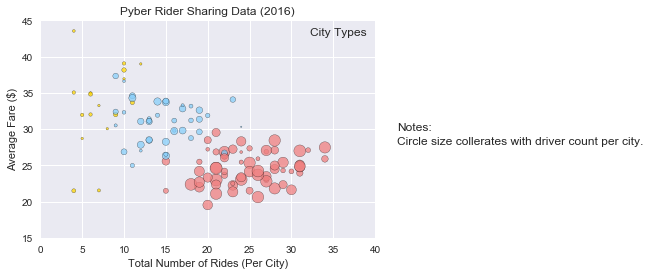

In [154]:
sns.set()
plt.show()

In [155]:
# In addition, you will be expected to produce the following three pie charts:
# % of Total Fares by City Type
# % of Total Rides by City Type
# % of Total Drivers by City Type

In [156]:
pb_df.groupby('type').fare.sum()

type
Rural        4255.09
Suburban    20335.69
Urban       40078.34
Name: fare, dtype: float64

In [157]:
t_fare_dict = pb_df.groupby('type').fare.sum().to_dict()
#t_fare_dict

In [158]:
pb_df.groupby('type').ride_id.count()

type
Rural        125
Suburban     657
Urban       1625
Name: ride_id, dtype: int64

In [159]:
t_ride_dict = pb_df.groupby('type').ride_id.count().to_dict()
#t_ride_dict

In [160]:
pb_df.groupby('type').driver_count.sum()

type
Rural         727
Suburban     9730
Urban       64501
Name: driver_count, dtype: int64

In [161]:
t_driver_dict = pb_df.groupby('type').driver_count.sum().to_dict()
#t_driver_dict

In [162]:
t_type_list = list(t_fare_dict.keys())
t_fare_list = list(t_fare_dict.values())
t_ride_list = list(t_ride_dict.values())
t_driver_list = list(t_driver_dict.values())

In [163]:
colors = ['Gold', 'lightskyblue', 'lightcoral']
explode = (0.1,0.1,0)

In [164]:
plt.pie(t_fare_list, explode=explode, labels=t_type_list, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=140)

([<matplotlib.patches.Wedge at 0xea20f70>,
 [Text(-1.058,0.566256,'Rural'),
  Text(-0.915343,-0.775981,'Suburban'),
  Text(0.967193,0.523963,'Urban')],
 [Text(-0.617164,0.330316,'6.6%'),
  Text(-0.53395,-0.452656,'31.4%'),
  Text(0.52756,0.285798,'62.0%')])

In [165]:
#plt.axis("equal")

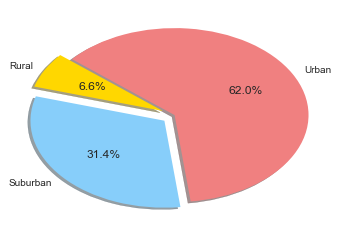

In [166]:
plt.show()

In [167]:
plt.pie(t_ride_list, explode=explode, labels=t_type_list, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=140)

([<matplotlib.patches.Wedge at 0xea59510>,
 [Text(-1.03233,0.611792,'Rural'),
  Text(-1.06123,-0.560167,'Suburban'),
  Text(1.04328,0.348661,'Urban')],
 [Text(-0.602194,0.356878,'5.2%'),
  Text(-0.619052,-0.326764,'27.3%'),
  Text(0.569062,0.190179,'67.5%')])

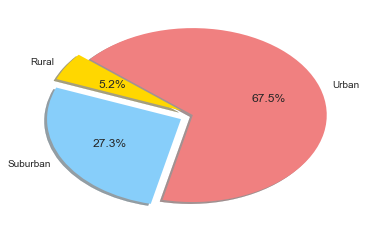

In [168]:
plt.show()

In [169]:
plt.pie(t_driver_list, explode=explode, labels=t_type_list, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=140)

([<matplotlib.patches.Wedge at 0xea87eb0>,
 [Text(-0.942326,0.742982,'Rural'),
  Text(-1.16856,0.272866,'Suburban'),
  Text(1.06307,-0.282645,'Urban')],
 [Text(-0.54969,0.433406,'1.0%'),
  Text(-0.681663,0.159172,'13.0%'),
  Text(0.579855,-0.15417,'86.0%')])

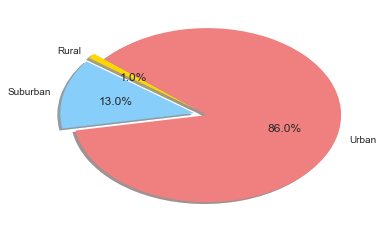

In [170]:
plt.show()